In [1]:
import mediapipe as mp
import numpy as np
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

In [2]:
BG_COLOUR = (192, 192, 192)
MASK_COLOUR = (255, 255, 255)

Options for ImageSegementer

In [3]:
model_path = "models/selfie_multiclass_256x256.tflite"
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.ImageSegmenterOptions(base_options=base_options,
                                       output_category_mask=True, output_confidence_masks=False)


Create image segementer

C:\Users\kb_f5\anaconda3\envs\masterclass\lib\site-packages\mediapipe\tasks\python\vision\image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()


Category: Background, Pixel Value: 0
Category: Hair, Pixel Value: 1
Category: Body Skin, Pixel Value: 2
Category: Face Skin, Pixel Value: 3
Category: Clothes, Pixel Value: 4
Segmentation mask of image: 


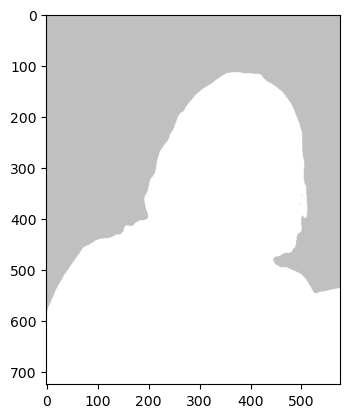

In [4]:
# Create image segmenter
with vision.ImageSegmenter.create_from_options(options=options) as segmenter:
    # Create mp image file to be segmented
    mp_image = mp.Image.create_from_file("data/20201124_142837.jpg")

    # Segment image
    segmentation_result = segmenter.segment(mp_image)

    # Retrieve masks for segmented image
    category_mask = segmentation_result.category_mask

    # Convert mask to np array
    mask_array = np.array(category_mask.numpy_view())

    # Define category labels
    labels = ['Background', 'Hair', 'Body Skin', 'Face Skin', 'Clothes', 'Others (Accessories)']

    # Map each unique value in the mask to its corresponding label
    unique_values = np.unique(mask_array)
    for value in unique_values:
        print(f"Category: {labels[value]}, Pixel Value: {value}")

    # Generate solid colour images for showing the output segmentation mask
    image_data = mp_image.numpy_view()
    fg_image = np.zeros(image_data.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOUR
    bg_image = np.zeros(image_data.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOUR

    condition = np.stack((category_mask.numpy_view(),) * 3, axis=-1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f"Segmentation mask of image: ")
    plt.imshow(output_image)
